In [1]:
import os
import numpy as np

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is E4DC-30DF

 Directory of C:\Users\chris\dsir907\Project 4

10/29/2021  10:42 AM    <DIR>          .
10/29/2021  10:42 AM    <DIR>          ..
10/28/2021  04:29 PM         4,158,509 .~Project 4 speaker map - cleaned_debate.csv
10/29/2021  12:49 AM    <DIR>          .ipynb_checkpoints
10/26/2021  04:22 PM    <DIR>          DSIR907-Project4-Group1
10/29/2021  10:42 AM            91,906 Model.ipynb
10/28/2021  04:29 PM         4,158,509 Project 4 speaker map - cleaned_debate.csv
               3 File(s)      8,408,924 bytes
               4 Dir(s)  354,795,925,504 bytes free


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Project 4 speaker map - cleaned_debate.csv')

In [5]:
rows = data[(data['Speaker_Map']=='Misc') | (data['Speaker_Map']=='Moderator') | (data['Speaker_Map'] == 'UNKNOWN')].index

In [6]:
data = data.drop(index = rows)

In [7]:
data['Speaker_Map'].unique()

array(['Republican', 'Democrat', nan], dtype=object)

In [8]:
data['Speaker'].fillna('Clinton', inplace=True)

In [9]:
data.dropna(inplace=True)

In [10]:
X= data.Text

In [11]:
y= data['Speaker_Map']

In [12]:
y.value_counts(normalize=True)

Republican    0.547623
Democrat      0.452377
Name: Speaker_Map, dtype: float64

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)

In [15]:
cvec_pipe = make_pipeline(CountVectorizer(stop_words = 'english', max_features = 1000), 
                          StandardScaler(with_mean=False), 
                          LogisticRegression(penalty = 'none', max_iter  = 1000))

In [16]:
cvec_pipe.fit(X_train,y_train)
cvec_pipe.score(X_test,y_test)

0.6457100591715976

In [17]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\chris\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


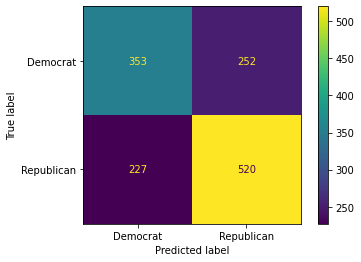

In [18]:
plot_confusion_matrix(cvec_pipe, X_test, y_test)

In [19]:
pd.concat([X_test,y_test], axis=1)

,Text,Speaker_Map
3698,... what we don’t want to do is give our alli...,Republican
568,Excuse me. He was against fracking. He said i...,Republican
2142,"And so we removed — we removed all of our...,",Republican
3902,"Well, Jim, our seniors depend on these progra...",Republican
3078,"Governor, the people in Detroit don’t forget....",Democrat
...,...,...
8578,Yes.) Did you clear the response you made wit...,Democrat
7312,"I do want to respond to that.,",Democrat
8573,"I don’t have a response., MS.",Democrat
3761,What is in the national interests of the Amer...,Republican


In [20]:
data['Predicted_Party']=cvec_pipe.predict(X)

In [21]:
is_misclassified = (data['Speaker_Map']==data['Predicted_Party']).replace([True, False], [0, 1])

In [22]:
data['is_misclassified']=is_misclassified

In [23]:
import copy

In [24]:
data2=copy.deepcopy(data)

In [25]:
mis_dict={}
for name in data['Speaker'].unique():
    mis_dict[name] = data[data['Speaker']==name]['is_misclassified'].sum()

In [35]:
mis_freq_dict = {}
for name in data['Speaker'].unique():
    mis_freq_dict[name]=data[data['Speaker']==name]['is_misclassified'].sum()/data[data['Speaker']==name].shape[0]

In [38]:
for key in set(mis_freq_dict.keys()):
    if mis_freq_dict[key]==1:
        del mis_freq_dict[key]

In [39]:
mis_freq_dict

{'PENCE': 0.16778523489932887,
 'HARRIS': 0.3548387096774194,
 'TRUMP': 0.1565217391304348,
 'BIDEN': 0.3419593345656192,
 'CLINTON': 0.25,
 'KAINE': 0.37894736842105264,
 'ROMNEY': 0.1722689075630252,
 'OBAMA': 0.20238095238095238,
 'ROMNEHY': 0.0,
 'RYAN': 0.2360248447204969,
 'MCCAIN': 0.09523809523809523,
 'PALIN': 0.2391304347826087,
 'KERRY': 0.13861386138613863,
 'BUSH': 0.1227364185110664,
 'OTIS': 0.0,
 'CHENEY': 0.13513513513513514,
 'EDWARDS': 0.1702127659574468,
 'GORE': 0.32653061224489793,
 'LIEBERMAN': 0.2647058823529412,
 'DOLE': 0.10344827586206896,
 'BERKLEY': 0.0,
 'MILLIGAN': 0.3333333333333333,
 'KEMP': 0.15,
 'PEROT': 0.14953271028037382,
 'QUAYLE': 0.15753424657534246,
 'STOCKDALE': 0.2727272727272727,
 'COMPTON': 0.3888888888888889,
 'DUKAKIS': 0.18292682926829268,
 'BENTSEN': 0.15625,
 'MONDALE': 0.16666666666666666,
 'PRESIDENT': 0.06666666666666667,
 'FERRARO': 0.17857142857142858,
 'REAGAN': 0.15,
 'CARTER': 0.12941176470588237,
 'FORD': 0.10526315789473684,

In [40]:
sorted_freq_values=[]
for _ in range(len(mis_freq_dict)):
    x = max(mis_freq_dict.values())
    candidate = list(mis_freq_dict.keys())[list(mis_freq_dict.values()).index(x)]
    sorted_freq_values.append((candidate, x))
    del mis_freq_dict[candidate]

In [26]:
sorted_values=[]
for _ in range(len(mis_dict)):
    x = max(mis_dict.values())
    candidate = list(mis_dict.keys())[list(mis_dict.values()).index(x)]
    sorted_values.append((candidate, x))
    del mis_dict[candidate]


In [42]:
freq_dataframe = pd.DataFrame(sorted_freq_values)

In [45]:
freq_dataframe.columns = ['Candidate','percent_misclassified']

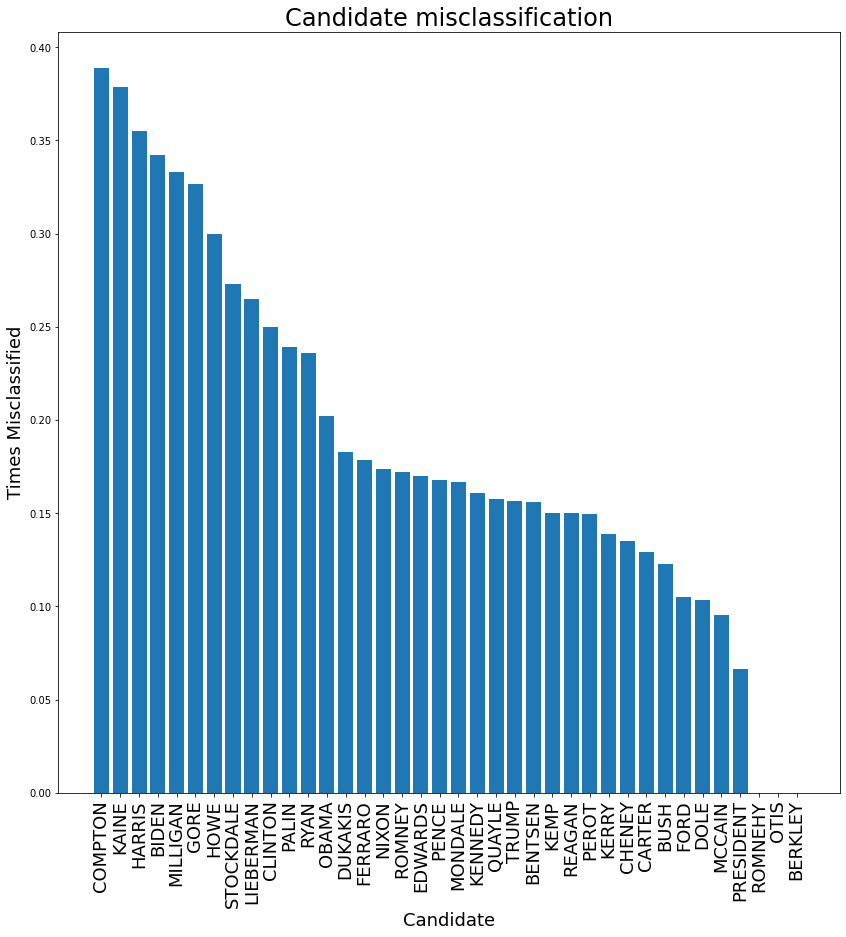

In [46]:
plt.figure(figsize=(14,14))
plt.bar(x=freq_dataframe['Candidate'], height=freq_dataframe['percent_misclassified'])
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('Candidate', size=18)
plt.ylabel('Times Misclassified', size=18)
plt.title("Candidate misclassification", fontsize=24);

In [27]:
sorted_values

[('BIDEN', 185),
 ('TRUMP', 126),
 ('GORE', 96),
 ('CLINTON', 95),
 ('OBAMA', 85),
 ('KAINE', 72),
 ('BUSH', 61),
 ('PENCE', 50),
 ('ROMNEY', 41),
 ('RYAN', 38),
 ('QUAYLE', 23),
 ('HARRIS', 22),
 ('MCCAIN', 22),
 ('PEROT', 16),
 ('DUKAKIS', 15),
 ('KERRY', 14),
 ('PALIN', 11),
 ('CARTER', 11),
 ('CHENEY', 10),
 ('LIEBERMAN', 9),
 ('DOLE', 9),
 ('MONDALE', 9),
 ('KENNEDY', 9),
 ('EDWARDS', 8),
 ('NIXON', 8),
 ('COMPTON', 7),
 ('KEMP', 6),
 ('STOCKDALE', 6),
 ('REAGAN', 6),
 ('FORD', 6),
 ('HOWE', 6),
 ('BENTSEN', 5),
 ('FERRARO', 5),
 ('PRESIDENT', 4),
 ('OBAM', 1),
 ('DAHLE', 1),
 ('MILLIGAN', 1),
 ('ROMNEHY', 0),
 ('OTIS', 0),
 ('BERKLEY', 0)]

In [28]:
import matplotlib.pyplot as plt

In [29]:
dataframe = pd.DataFrame(sorted_values)

In [30]:
dataframe.columns=['Candidate','times_misclassified']

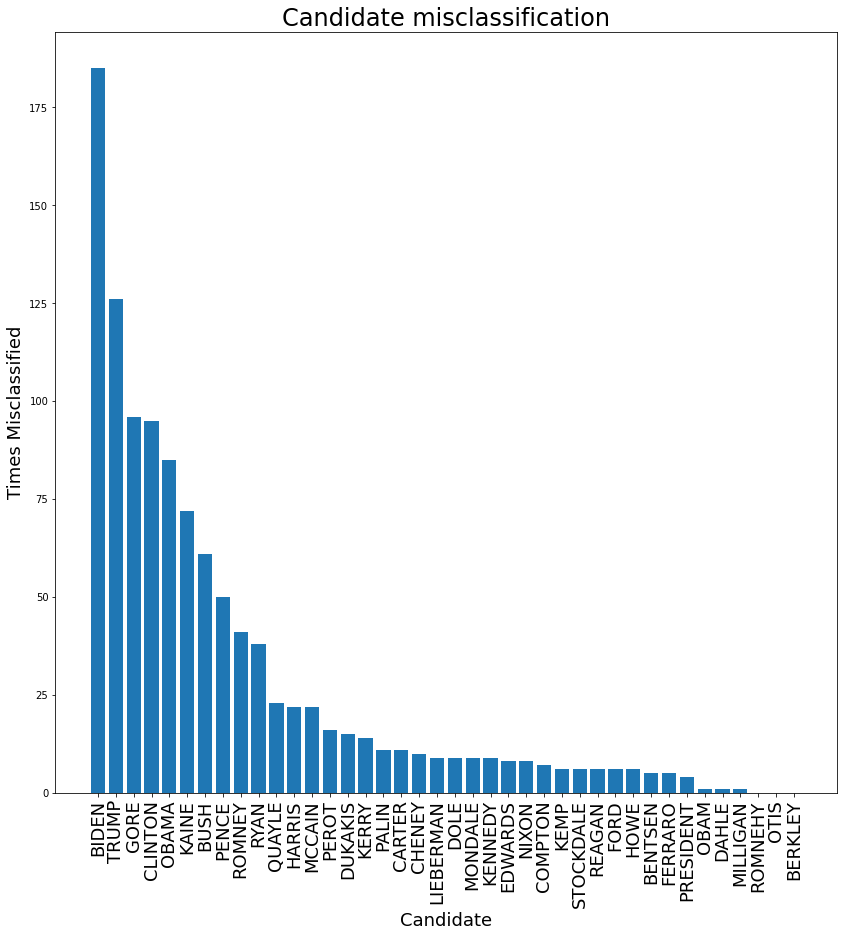

In [31]:
plt.figure(figsize=(14,14))
plt.bar(x=dataframe['Candidate'], height=dataframe['times_misclassified'])
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('Candidate', size=18)
plt.ylabel('Times Misclassified', size=18)
plt.title("Candidate misclassification", fontsize=24);